## Введение

В век информационных технологий, когда ежедневно генерируются огромные объемы данных, важность эффективного управления ими становится все более очевидной. Будучи новым ресурсом цифровой экономики, данные требуют инновационных подходов к их хранению, обработке и передаче. Одним из основных методов оптимизации использования данных является сжатие, которое позволяет значительно уменьшить объем данных, снизить затраты на их хранение и ускорить процессы передачи информации. Сжатие данных не только экономит ресурсы, но и повышает производительность системы, в которой эти данные используются.

Процесс сжатия данных зависит от множества факторов, важнейшими из которых являются качество предварительного анализа данных и правильное построение признаков. Эффективность сжатия зависит от правильного выбора алгоритмов и методик. Алгоритмы и методики должны быть адаптированы к характеристикам данных и задаче, для которой они используются. Например, методы сжатия, используемые для мультимедийных файлов, сильно отличаются от тех, что применяются для текстовых или сенсорных данных. Поэтому для разработки эффективных методов сжатия необходимо хорошо понимать характеристики и назначение данных.

Цель данного задания - изучить методы предварительного анализа данных и генерации признаков для задач сжатия информации. Курс включает в себя изучение теоретических основ этих процессов, разработку алгоритмов и программ на языке Python, а также анализ и оптимизацию полученных результатов.

Объектом исследования в данной работе являются методы предварительного анализа данных и построения признаков, применяемые в задачах сжатия информации. Исследование фокусируется на анализе различных подходов к обработке и трансформации данных, которые могут повысить эффективность сжатия без потерь качества.

Теоретическая основа работы включает в себя изучение литературы и научных источников, посвященных сжатию данных, машинному обучению и анализу данных. Особое внимание уделяется работам, описывающим алгоритмы и методы для оптимального выбора и трансформации признаков, а также их влияние на процессы сжатия информации. Важную роль играет анализ научных публикаций, посвященных применению этих методов в различных областях, таких как обработка изображений, аудио и текстовых данных.

Практическая основа работы заключается в разработке и тестировании программного обеспечения на языке Python, которое реализует выбранные алгоритмы предварительного анализа данных и построения признаков для сжатия информации. Программное обеспечение будет разработано с целью демонстрации того, как различные подходы к обработке данных могут влиять на их сжатие.

Таким образом, данная работа представляет собой комплексный анализ проблемы сжатия данных, начиная с теоретических основ и заканчивая практическим применением разработанного решения. Результаты данной работы не только помогают углубить понимание процесса предварительного анализа и генерации признаков, но и способствуют разработке более эффективных методов обработки и сжатия информации.


## Установка

Для начала необходимо установить сжатие TensorFlow с помощью команды pip

In [ ]:
%%bash
# Устанавливаем последнюю версию TFC, совместимую с установленной версией TF.

read MAJOR MINOR <<< "$(pip show tensorflow | perl -p -0777 -e 's/.*Version: (\d+)\.(\d+).*/\1 \2/sg')"
pip install "tensorflow-compression<$MAJOR.$(($MINOR+1))"


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 262.5/262.5 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 489.9/489.9 MB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 100.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 102.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 55.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 76.6 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-probability
    Found existing installation: tensorflow-probability 0.23.0
    Uninstalling tensorflow-probability-0.23.0:
      Successfully uninstalled tensorflow-probability-0.23.0
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.15.0
    Uninstalling tensorflow-estimator-2.15.0:
      Successfully uninstalled tensorflow-estimator-2.15.0
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Unin

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-keras 2.15.1 requires tensorflow<2.16,>=2.15, but you have tensorflow 2.14.1 which is incompatible.


Затем импортируем библиотеки

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_compression as tfc
import tensorflow_datasets as tfds


## Определяем модель тренажера.

Поскольку модель похожа на автоэнкодер, а нам нужно выполнять другой набор функций во время обучения и логического вывода, настройка немного отличается, скажем, от классификатора.

Модель обучения состоит из трех частей:
- преобразование **анализа** (или кодера), преобразующее изображение в скрытое пространство,
- преобразование **синтеза** (или декодера), преобразующее скрытое пространство обратно в пространство изображения, и
- априорная и энтропийная модели, моделирующие предельные вероятности латентных состояний.

Сначала определим преобразования:

In [ ]:
def make_analysis_transform(latent_dims):
  """Creates the analysis (encoder) transform."""
  return tf.keras.Sequential([
      tf.keras.layers.Conv2D(
          20, 5, use_bias=True, strides=2, padding="same",
          activation="leaky_relu", name="conv_1"),
      tf.keras.layers.Conv2D(
          50, 5, use_bias=True, strides=2, padding="same",
          activation="leaky_relu", name="conv_2"),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(
          500, use_bias=True, activation="leaky_relu", name="fc_1"),
      tf.keras.layers.Dense(
          latent_dims, use_bias=True, activation=None, name="fc_2"),
  ], name="analysis_transform")


In [ ]:
def make_synthesis_transform():
  """Creates the synthesis (decoder) transform."""
  return tf.keras.Sequential([
      tf.keras.layers.Dense(
          500, use_bias=True, activation="leaky_relu", name="fc_1"),
      tf.keras.layers.Dense(
          2450, use_bias=True, activation="leaky_relu", name="fc_2"),
      tf.keras.layers.Reshape((7, 7, 50)),
      tf.keras.layers.Conv2DTranspose(
          20, 5, use_bias=True, strides=2, padding="same",
          activation="leaky_relu", name="conv_1"),
      tf.keras.layers.Conv2DTranspose(
          1, 5, use_bias=True, strides=2, padding="same",
          activation="leaky_relu", name="conv_2"),
  ], name="synthesis_transform")


Тренажер содержит экземпляр обоих преобразований, а также параметры предыдущего.

Его метод "call" настроен для вычисления:
- **rate**, оценки количества битов, необходимого для представления набора цифр, и
- **distortion**, средняя абсолютная разница между пикселями исходных цифр и их восстановлениями.

In [ ]:
class MNISTCompressionTrainer(tf.keras.Model):
  """Model that trains a compressor/decompressor for MNIST."""

  def __init__(self, latent_dims):
    super().__init__()
    self.analysis_transform = make_analysis_transform(latent_dims)
    self.synthesis_transform = make_synthesis_transform()
    self.prior_log_scales = tf.Variable(tf.zeros((latent_dims,)))

  @property
  def prior(self):
    return tfc.NoisyLogistic(loc=0., scale=tf.exp(self.prior_log_scales))

  def call(self, x, training):
    """Computes rate and distortion losses."""
    # Убедимся, что входные данные находятся в диапазоне с плавающей запятой (0, 1).
    x = tf.cast(x, self.compute_dtype) / 255.
    x = tf.reshape(x, (-1, 28, 28, 1))

    # Вычисляем представление скрытого пространства y, возмущаем его и моделируем его энтропию,
    # затем вычисляем восстановленное представление на уровне пикселей x_hat.
    y = self.analysis_transform(x)
    entropy_model = tfc.ContinuousBatchedEntropyModel(
        self.prior, coding_rank=1, compression=False)
    y_tilde, rate = entropy_model(y, training=training)
    x_tilde = self.synthesis_transform(y_tilde)

    # Среднее количество битов на разряд MNIST.
    rate = tf.reduce_mean(rate)

    # Средняя абсолютная разница в пикселях.
    distortion = tf.reduce_mean(abs(x - x_tilde))

    return dict(rate=rate, distortion=distortion)


## Вычислим скорость и искажения.

Рассмотрим этот процесс пошагово, используя одно изображение из обучающего набора. Загрузим набор данных MNIST для обучения и проверки:

In [ ]:
training_dataset, validation_dataset = tfds.load(
    "mnist",
    split=["train", "test"],
    shuffle_files=True,
    as_supervised=True,
    with_info=False,
)


Dl Completed...:   0%|          | 0/5 [00:00<?, ? file/s]

Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.


Извлечем одно изображение $x$:

Data type: <dtype: 'uint8'>
Shape: (28, 28, 1)


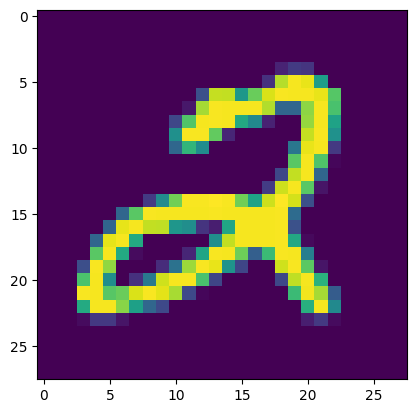

In [ ]:
(x, _), = validation_dataset.take(1)

plt.imshow(tf.squeeze(x))
print(f"Data type: {x.dtype}")
print(f"Shape: {x.shape}")


Чтобы получить скрытое представление $y$, нужно преобразовать его в `float32`, добавить пакетное измерение и пропустить его через аналитическое преобразование.

In [ ]:
x = tf.cast(x, tf.float32) / 255.
x = tf.reshape(x, (-1, 28, 28, 1))
y = make_analysis_transform(10)(x)

print("y:", y)


y: tf.Tensor(
[[ 0.03913182  0.1248884  -0.028789   -0.04262319 -0.00870677 -0.01659984
  -0.06907002  0.08343831  0.12019496 -0.10952755]], shape=(1, 10), dtype=float32)


Латентное значение будет квантовано во время тестирования. Чтобы смоделировать это дифференцируемым образом во время обучения, добавим равномерный шум в интервале $(-.5, .5)$ и называем результат $\tilde y$.

In [ ]:
y_tilde = y + tf.random.uniform(y.shape, -.5, .5)

print("y_tilde:", y_tilde)


y_tilde: tf.Tensor(
[[ 0.44314283  0.35708186 -0.35891876 -0.35485342 -0.28914866  0.2158752
  -0.15123072 -0.39970812  0.11440055 -0.13860807]], shape=(1, 10), dtype=float32)


"prior" - это плотность вероятности, которую мы используем для моделирования предельного распределения зашумленного латентного параметра. Например, это может быть набор независимых логистических распределений с разными масштабами для каждого латентного параметра. `tfc.NoisyLogistic" объясняет тот факт, что латентные объекты имеют аддитивный шум. Когда масштаб приближается к нулю, логистическое распределение приближается к дельте Дирака (всплеску), но добавленный шум приводит к тому, что "зашумленное" распределение приближается к равномерному распределению.

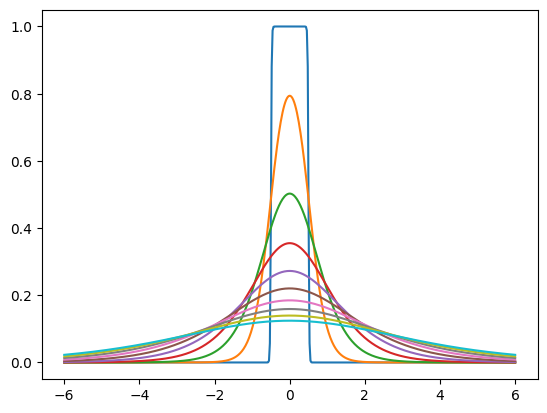

In [ ]:
prior = tfc.NoisyLogistic(loc=0., scale=tf.linspace(.01, 2., 10))

_ = tf.linspace(-6., 6., 501)[:, None]
plt.plot(_, prior.prob(_));


Во время обучения `tfc.ContinuousBatchedEntropyModel` добавляет равномерный шум и использует шум и предшествующий уровень для вычисления (дифференцируемой) верхней границы скорости (среднее количество бит, необходимое для кодирования скрытого представления). Эта граница может быть сведена к минимуму как потеря.

In [ ]:
entropy_model = tfc.ContinuousBatchedEntropyModel(
    prior, coding_rank=1, compression=False)
y_tilde, rate = entropy_model(y, training=True)

print("rate:", rate)
print("y_tilde:", y_tilde)


rate: tf.Tensor([18.134792], shape=(1,), dtype=float32)
y_tilde: tf.Tensor(
[[ 0.22828645  0.20368692  0.11315863  0.3798035   0.37720242 -0.00419194
   0.413802   -0.00308189 -0.26599127  0.01174656]], shape=(1, 10), dtype=float32)


Наконец, зашумленные латентные элементы передаются обратно через синтезирующее преобразование для получения реконструкции изображения $\tilde x$. Искажение - это ошибка между исходным изображением и реконструкцией. Очевидно, что при необученных преобразованиях реконструкция не очень полезна.

distortion: tf.Tensor(0.17081584, shape=(), dtype=float32)
Data type: <dtype: 'uint8'>
Shape: (28, 28, 1)


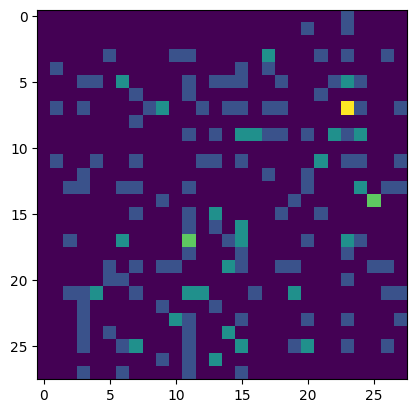

In [ ]:
x_tilde = make_synthesis_transform()(y_tilde)

# Средняя абсолютная разница в пикселях.
distortion = tf.reduce_mean(abs(x - x_tilde))
print("distortion:", distortion)

x_tilde = tf.saturate_cast(x_tilde[0] * 255, tf.uint8)
plt.imshow(tf.squeeze(x_tilde))
print(f"Data type: {x_tilde.dtype}")
print(f"Shape: {x_tilde.shape}")


Для каждого набора цифр при вызове функции "Mnistcompressiontraner" вычисляются частота и искажения в среднем по этому набору:

In [ ]:
(example_batch, _), = validation_dataset.batch(32).take(1)
trainer = MNISTCompressionTrainer(10)
example_output = trainer(example_batch)

print("rate: ", example_output["rate"])
print("distortion: ", example_output["distortion"])


rate:  tf.Tensor(20.296253, shape=(), dtype=float32)
distortion:  tf.Tensor(0.14659302, shape=(), dtype=float32)


В следующем разделе мы настроим модель для выполнения градиентного спуска по этим двум потерям.

## Обучаем модель.

Скомпилируем тренажер таким образом, чтобы он оптимизировал лагранжиан зависимости скорости от искажения, то есть сумму скорости и искажения, где одно из слагаемых взвешивается с помощью параметра Лагранжа $\lambda$.

Эта функция потерь по-разному влияет на разные части модели:
- Аналитическое преобразование обучено создавать скрытое представление, которое обеспечивает желаемый компромисс между скоростью и искажениями.
- Синтезирующее преобразование обучено минимизировать искажения, учитывая скрытое представление.
- Параметры априора настраиваются таким образом, чтобы минимизировать частоту с учетом скрытого представления.

In [ ]:
def pass_through_loss(_, x):
  # Поскольку скорость и искажения не контролируются, для потери не нужна цель.
  return x

def make_mnist_compression_trainer(lmbda, latent_dims=50):
  trainer = MNISTCompressionTrainer(latent_dims)
  trainer.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    # Просто пропустите скорость и искажения как потери / показатели.
    loss=dict(rate=pass_through_loss, distortion=pass_through_loss),
    metrics=dict(rate=pass_through_loss, distortion=pass_through_loss),
    loss_weights=dict(rate=1., distortion=lmbda),
  )
  return trainer


Затем обучаем модель через удаление изображений и добавление "фиктивных" целей для определения скорости и искажений

In [ ]:
def add_rd_targets(image, label):
  # Обучение проводится без присмотра, поэтому метки здесь не нужны. Однако нам
  # нужно добавить "фиктивные" цели для определения скорости и искажений.
  return image, dict(rate=0., distortion=0.)

def train_mnist_model(lmbda):
  trainer = make_mnist_compression_trainer(lmbda)
  trainer.fit(
      training_dataset.map(add_rd_targets).batch(128).prefetch(8),
      epochs=15,
      validation_data=validation_dataset.map(add_rd_targets).batch(128).cache(),
      validation_freq=1,
      verbose=1,
  )
  return trainer

trainer = train_mnist_model(lmbda=2000)


Epoch 1/15
469/469 [==============================] - ETA: 0s - loss: 219.5694 - distortion_loss: 0.0598 - rate_loss: 99.8761 - distortion_pass_through_loss: 0.0598 - rate_pass_through_loss: 99.8718

469/469 [==============================] - 88s 172ms/step - loss: 219.5694 - distortion_loss: 0.0598 - rate_loss: 99.8761 - distortion_pass_through_loss: 0.0598 - rate_pass_through_loss: 99.8718 - val_loss: 178.7710 - val_distortion_loss: 0.0435 - val_rate_loss: 91.8550 - val_distortion_pass_through_loss: 0.0435 - val_rate_pass_through_loss: 91.8591
Epoch 2/15
469/469 [==============================] - 64s 136ms/step - loss: 166.7223 - distortion_loss: 0.0414 - rate_loss: 83.8953 - distortion_pass_through_loss: 0.0414 - rate_pass_through_loss: 83.8912 - val_loss: 156.1603 - val_distortion_loss: 0.0404 - val_rate_loss: 75.3489 - val_distortion_pass_through_loss: 0.0404 - val_rate_pass_through_loss: 75.3547
Epoch 3/15
469/469 [==============================] - 62s 133ms/step - loss: 151.5741 - distortion_loss: 0.0402 - rate_loss: 71.1228 - distortion_pass_through_loss: 0.0402 - rate_pass_through_loss: 71.1200 - val_loss: 144.6071 - val_distortion_loss: 0.0404 - val_rate_loss: 63.8936 - v

## Сжатие некоторых изображений MNIST.

Для сжатия и распаковки во время тестирования мы разделили обученную модель на две части:

- Кодирующая часть состоит из аналитического преобразования и энтропийной модели.
- Декодирующая часть состоит из синтезирующего преобразования и той же энтропийной модели.

Во время тестирования латентные данные не будут иметь аддитивного шума, но они будут квантованы, а затем сжаты без потерь, поэтому мы даем им новые названия. Мы называем их и реконструкцию изображения $x$ и $y$ соответственно.

In [ ]:
class MNISTCompressor(tf.keras.Model):
  """Compresses MNIST images to strings."""

  def __init__(self, analysis_transform, entropy_model):
    super().__init__()
    self.analysis_transform = analysis_transform
    self.entropy_model = entropy_model

  def call(self, x):
    # Убедимся, что входные данные находятся в диапазоне с плавающей запятой (0, 1).
    x = tf.cast(x, self.compute_dtype) / 255.
    y = self.analysis_transform(x)
    # Также возвращает точное информационное содержание каждой цифры.
    _, bits = self.entropy_model(y, training=False)
    return self.entropy_model.compress(y), bits


In [ ]:
class MNISTDecompressor(tf.keras.Model):
  """Decompresses MNIST images from strings."""

  def __init__(self, entropy_model, synthesis_transform):
    super().__init__()
    self.entropy_model = entropy_model
    self.synthesis_transform = synthesis_transform

  def call(self, string):
    y_hat = self.entropy_model.decompress(string, ())
    x_hat = self.synthesis_transform(y_hat)
    # Масштабирование и приведение обратно к 8-битному целому числу.
    return tf.saturate_cast(tf.round(x_hat * 255.), tf.uint8)


При создании экземпляра с параметром "compression=True" энтропийная модель преобразует полученные данные в таблицы для алгоритма кодирования диапазона. При вызове "compress()" этот алгоритм вызывается для преобразования скрытого пространственного вектора в битовые последовательности. Длина каждой двоичной строки приблизительно соответствует информационному содержанию скрытой строки (отрицательная логарифмическая вероятность скрытой строки по сравнению с предыдущей).

Энтропийная модель для сжатия и распаковки должна быть одинаковой, поскольку таблицы кодирования диапазона должны быть абсолютно идентичными с обеих сторон. В противном случае могут возникнуть ошибки декодирования.

In [ ]:
def make_mnist_codec(trainer, **kwargs):
  # Энтропийная модель должна быть создана с параметром `compression=True` и одинаковым
  # Экземпляр должен быть общим для компрессора и декомпрессора.
  entropy_model = tfc.ContinuousBatchedEntropyModel(
      trainer.prior, coding_rank=1, compression=True, **kwargs)
  compressor = MNISTCompressor(trainer.analysis_transform, entropy_model)
  decompressor = MNISTDecompressor(entropy_model, trainer.synthesis_transform)
  return compressor, decompressor

compressor, decompressor = make_mnist_codec(trainer)


Возьмем 16 изображений из набора данных для проверки.

In [ ]:
(originals, _), = validation_dataset.batch(16).skip(3).take(1)


Сожмем их в строки и отследим каждое их информационное содержимое в битах.

In [ ]:
strings, entropies = compressor(originals)

print(f"String representation of first digit in hexadecimal: 0x{strings[0].numpy().hex()}")
print(f"Number of bits actually needed to represent it: {entropies[0]:0.2f}")


String representation of first digit in hexadecimal: 0x125ec729d428
Number of bits actually needed to represent it: 44.37


Извлечем изображения обратно из строк.

In [ ]:
reconstructions = decompressor(strings)


Отобразим каждую из 16 исходных цифр вместе с ее сжатым двоичным представлением и восстановленной цифрой.

In [ ]:
#@title

def display_digits(originals, strings, entropies, reconstructions):
  """Visualizes 16 digits together with their reconstructions."""
  fig, axes = plt.subplots(4, 4, sharex=True, sharey=True, figsize=(12.5, 5))
  axes = axes.ravel()
  for i in range(len(axes)):
    image = tf.concat([
        tf.squeeze(originals[i]),
        tf.zeros((28, 14), tf.uint8),
        tf.squeeze(reconstructions[i]),
    ], 1)
    axes[i].imshow(image)
    axes[i].text(
        .5, .5, f"→ 0x{strings[i].numpy().hex()} →\n{entropies[i]:0.2f} bits",
        ha="center", va="top", color="white", fontsize="small",
        transform=axes[i].transAxes)
    axes[i].axis("off")
  plt.subplots_adjust(wspace=0, hspace=0, left=0, right=1, bottom=0, top=1)


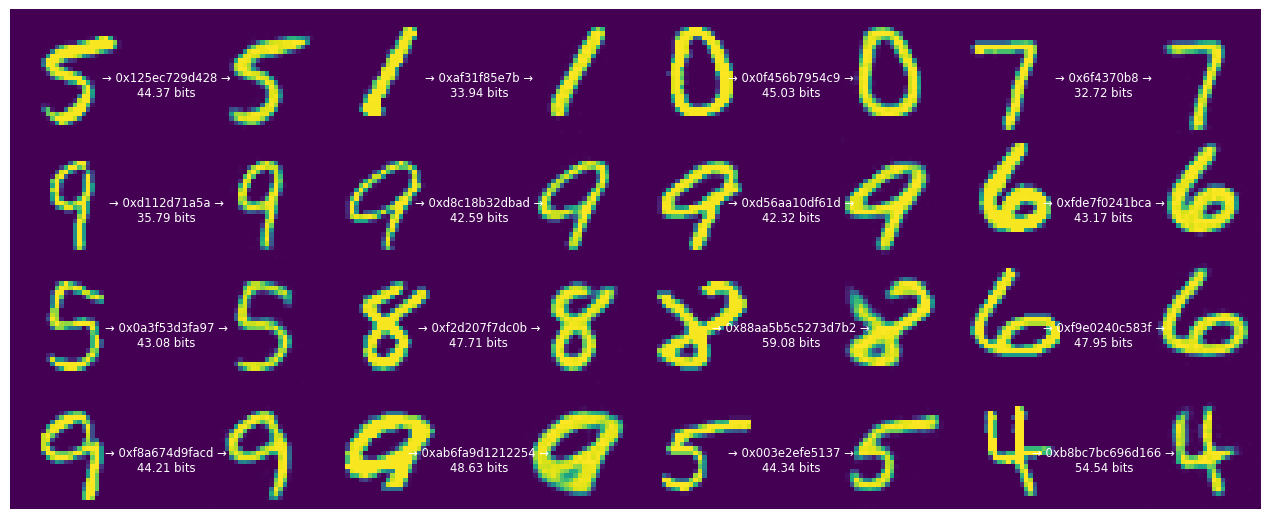

In [ ]:
display_digits(originals, strings, entropies, reconstructions)


Длина закодированной строки отличается от информационного содержания каждой цифры. Это связано с тем, что процесс кодирования диапазона работает с дискретными вероятностями и сопряжен с небольшими затратами. Поэтому, особенно для коротких строк, соответствие является лишь приблизительным. Однако кодирование по диапазону является асимптотически оптимальным: в пределе ожидаемое количество битов будет приближаться к перекрестной энтропии (ожидаемому информационному содержанию), для которой термин скорости в обучающей модели является верхней границей.

## Соотношение скорости и искажения

Как указано выше, модель была обучена для определенного соотношения (заданного как "lmbda=2000") между средним числом битов, используемых для представления каждой цифры, и возникающей ошибкой при восстановлении.

Повторим эксперимент, уменьшив значение $\lambda$ до 500.

Epoch 1/15
469/469 [==============================] - ETA: 0s - loss: 127.8557 - distortion_loss: 0.0707 - rate_loss: 92.5237 - distortion_pass_through_loss: 0.0707 - rate_pass_through_loss: 92.5174

469/469 [==============================] - 66s 136ms/step - loss: 127.8557 - distortion_loss: 0.0707 - rate_loss: 92.5237 - distortion_pass_through_loss: 0.0707 - rate_pass_through_loss: 92.5174 - val_loss: 107.7906 - val_distortion_loss: 0.0565 - val_rate_loss: 79.5396 - val_distortion_pass_through_loss: 0.0565 - val_rate_pass_through_loss: 79.5452
Epoch 2/15
469/469 [==============================] - 59s 127ms/step - loss: 97.0285 - distortion_loss: 0.0535 - rate_loss: 70.2859 - distortion_pass_through_loss: 0.0535 - rate_pass_through_loss: 70.2806 - val_loss: 85.9842 - val_distortion_loss: 0.0593 - val_rate_loss: 56.3101 - val_distortion_pass_through_loss: 0.0594 - val_rate_pass_through_loss: 56.3083
Epoch 3/15
469/469 [==============================] - 60s 128ms/step - loss: 81.0235 - distortion_loss: 0.0557 - rate_loss: 53.1940 - distortion_pass_through_loss: 0.0557 - rate_pass_through_loss: 53.1900 - val_loss: 71.7974 - val_distortion_loss: 0.0682 - val_rate_loss: 37.6855 - val_d

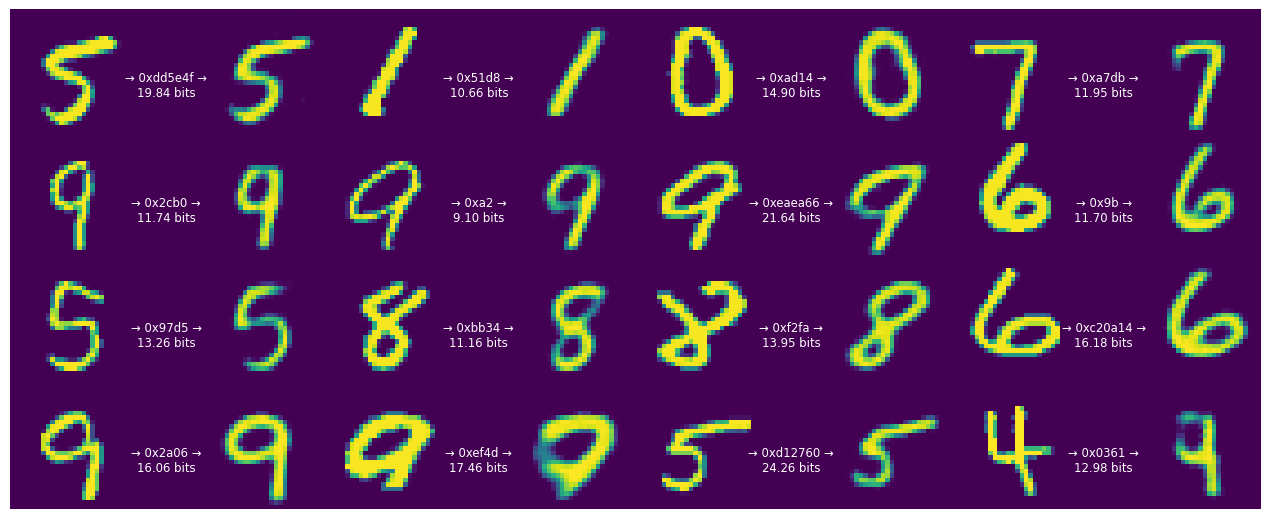

In [ ]:
def train_and_visualize_model(lmbda):
  trainer = train_mnist_model(lmbda=lmbda)
  compressor, decompressor = make_mnist_codec(trainer)
  strings, entropies = compressor(originals)
  reconstructions = decompressor(strings)
  display_digits(originals, strings, entropies, reconstructions)

train_and_visualize_model(lmbda=500)


Скорость передачи данных в нашем коде снижается, как и точность цифр. Однако большинство цифр остаются узнаваемыми. Сократим еще больше знаение $\lambda$.

Epoch 1/15
469/469 [==============================] - ETA: 0s - loss: 113.8326 - distortion_loss: 0.0760 - rate_loss: 91.0288 - distortion_pass_through_loss: 0.0760 - rate_pass_through_loss: 91.0222

469/469 [==============================] - 66s 138ms/step - loss: 113.8326 - distortion_loss: 0.0760 - rate_loss: 91.0288 - distortion_pass_through_loss: 0.0760 - rate_pass_through_loss: 91.0222 - val_loss: 96.1697 - val_distortion_loss: 0.0655 - val_rate_loss: 76.5255 - val_distortion_pass_through_loss: 0.0655 - val_rate_pass_through_loss: 76.5299
Epoch 2/15
469/469 [==============================] - 62s 132ms/step - loss: 85.8402 - distortion_loss: 0.0610 - rate_loss: 67.5321 - distortion_pass_through_loss: 0.0610 - rate_pass_through_loss: 67.5266 - val_loss: 73.7095 - val_distortion_loss: 0.0747 - val_rate_loss: 51.2930 - val_distortion_pass_through_loss: 0.0747 - val_rate_pass_through_loss: 51.2980
Epoch 3/15
469/469 [==============================] - 60s 128ms/step - loss: 68.7585 - distortion_loss: 0.0642 - rate_loss: 49.4883 - distortion_pass_through_loss: 0.0642 - rate_pass_through_loss: 49.4842 - val_loss: 58.3106 - val_distortion_loss: 0.0901 - val_rate_loss: 31.2719 - val_di

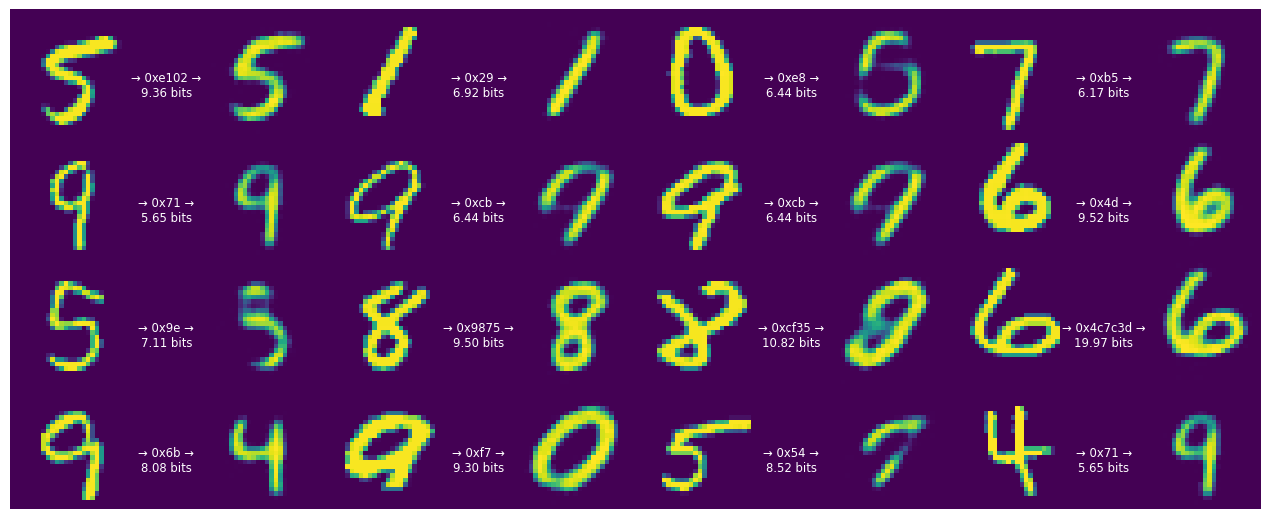

In [ ]:
train_and_visualize_model(lmbda=300)


Теперь строки становятся намного короче, примерно на один байт на цифру. Однако это требует определенных затрат. Большее количество цифр становится неузнаваемым.

Это демонстрирует, что данная модель не зависит от человеческого восприятия ошибок, она просто измеряет абсолютное отклонение в пикселях. Чтобы добиться лучшего воспринимаемого качества изображения, нам нужно было бы заменить потерю пикселя потерей восприятия.

## Используем декодер в качестве генерирующей модели.

Если мы введем в декодер случайные биты, это приведет к эффективной выборке из распределения, которое модель научилась представлять цифрами.

Повторно создадим экземпляр компрессора/декомпрессора без проверки работоспособности, которая определила бы, не полностью ли декодирована входная строка.

In [ ]:
compressor, decompressor = make_mnist_codec(trainer, decode_sanity_check=False)


Теперь загрузим в декомпрессор достаточно длинные случайные строки, чтобы он мог декодировать / извлекать из них цифры.

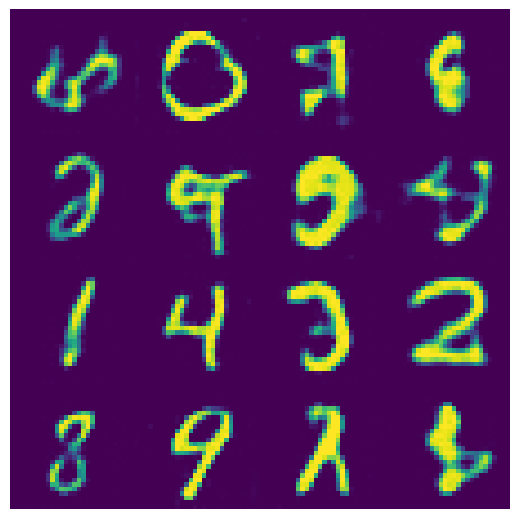

In [ ]:
import os

strings = tf.constant([os.urandom(8) for _ in range(16)])
samples = decompressor(strings)

fig, axes = plt.subplots(4, 4, sharex=True, sharey=True, figsize=(5, 5))
axes = axes.ravel()
for i in range(len(axes)):
  axes[i].imshow(tf.squeeze(samples[i]))
  axes[i].axis("off")
plt.subplots_adjust(wspace=0, hspace=0, left=0, right=1, bottom=0, top=1)


## Заключение

В данной курсовой работе были рассмотрены теоретические и практические аспекты предварительного анализа данных и построения признаков в задачах сжатия информации. Через изучение различных методик и алгоритмов, мы обнаружили значительное влияние качества предварительного анализа и выбора признаков на эффективность сжатия данных.

В ходе работы была написана и тщательно протестирована программа, чтобы обеспечить её надёжность и эффективность. Результаты тестирования подтвердили, что программа корректно выполняет все задачи и эффективно обрабатывает данные. Оптимизация процессов привела к значительному улучшению производительности. Применение многопоточности и оптимизированных алгоритмов позволило сократить время обработки данных и улучшить общую эффективность сжатия. Анализ результатов показал, что правильный выбор и настройка признаков существенно повышают качество сжатия данных без потери важной информации.

В заключение, данная курсовая работа демонстрирует важность интеграции теоретических знаний и практических навыков в области обработки и анализа данных. Полученные знания и опыт могут быть применены в реальных проектах и исследованиях, связанных с обработкой больших объемов данных, где важно не только сохранение информации, но и оптимизация ресурсов.

## Список источников

Законодательные и нормативные акты:
1.	ГOCT Р 7.0.12-2011 Библиографическая запись. Сокращение слов и словосочетаний на русском языке. Общие требования и правила. – М.: Стандартинформ, 2012. – 61 с.
2.	ГOCT 7.1-2003 Библиографическая запись. Библиографическое описание. Общие требования и правила составления. – М.: Стандартинформ, 2010. – 92 с.
3.	ГOCT 7.32-2017 Отчет о научно-исследовательской работе. Структура и правила оформления. – М.: Стандартинформ, 2017. – 47 с.
4.	ГOCT 7.82-2001 Библиографическая запись. Библиографическое описание электронных ресурсов. Общие требования и правила составления. – М.: ИПК Издательство стандартов, 2001. – 39 с.
5.	ГOCT Р 7.0.100-2018 Библиографическая запись. Библиографическое описание. Общие требования и правила составления. – М.: Стандартинформ, 2018. – 122 с.
6.	ГOCT Р 7.0.5-2008 Библиографическая ссылка. Общие требования и правила составления. – М.: Стандартинформ, 2008. – 32 с.
7.	Единая система программной документации. – М.: Стандартинформ, 2005. – 128 с.

Учебная и научная литература:
8.	Ревякин А.М., Скурнович А.В. Распознавание контента сжатых неподвижных графических сообщений на уровне коэффициентов дискретного косинусного преобразования // Новые информационные технологии в автоматизированных системах. 2017. №20.
9.	Чье Ен Ун, Левенец А. В., Нильга В. В. Представление телемеханических данных однородными n-мерными структурами как предварительная обработка в задачах сжатия // Информационно-управляющие системы. 2011.

Интернет-документы:
11.	TensorFlow. – [Электронный ресурс]. – URL: https://www.tensorflow.org/ (дата обращения: 10.03.2024)
12.	Timescale. – [Электронный ресурс]. – URL: https://www.timescale.com/ (дата обращения: 10.03.2024)
13.	Techtarget. – [Электронный ресурс]. – URL: https://www.techtarget.com/ (дата обращения: 10.03.2024)
14.	Strikingloo. – [Электронный ресурс]. – URL: https://strikingloo.github.io/ (дата обращения: 10.03.2024)
15.	Geeksforgeeks. – [Электронный ресурс]. – URL: https://www.geeksforgeeks.org/ (дата обращения: 10.03.2024)





